In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [45]:
def plot_heatmap(metrics_data, plt_title, focal_metrics):
    # Set aesthetics and style
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'DejaVu Sans'],
        'font.size': 14,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10
    })

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 7))

    # Set up metrics pivot
    metrics_pivot = metrics_data.set_index('Model')
    
    # Create mask for focal metrics (True for non-focal metrics)
    mask_standard = np.zeros_like(metrics_pivot.values, dtype=bool)
    for i, col in enumerate(metrics_pivot.columns):
        if col not in focal_metrics:
            mask_standard[:, i] = True
    
    # Create inverse mask for focal metrics (True for focal metrics)
    mask_focal = ~mask_standard
    
    # Create colormaps
    standard_cmap = sns.light_palette("#3498db", as_cmap=True)  # Blue for standard
    focal_cmap = sns.light_palette("#e74c3c", as_cmap=True)     # Red for focal
    
    # First plot the standard metrics with blue colormap
    sns.heatmap(metrics_pivot,
                annot=True,
                fmt='.2f',
                cmap=standard_cmap,
                linewidths=1,
                linecolor='white',
                mask=mask_focal,  # Apply to non-focal metrics
                cbar=False,
                ax=ax)
    
    # Then plot the focal metrics with red colormap
    sns.heatmap(metrics_pivot,
                annot=True,
                fmt='.2f',
                cmap=focal_cmap,
                linewidths=1,
                linecolor='white',
                mask=mask_standard,  # Apply to focal metrics
                cbar=False,
                ax=ax)

    # Add a title and style it
    plt.title(plt_title, fontweight='bold', pad=20)

    # Add labels explaining the color scheme
    ax.text(0.78, 1.05, 'Standard Metrics', transform=ax.transAxes, 
            fontsize=11, color='#3498db', fontweight='bold')
    ax.text(0.9, 1.05, 'Focal Metrics', transform=ax.transAxes, 
            fontsize=11, color='#e74c3c', fontweight='bold')

    # General styling
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(axis='x')
    ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('#dddddd')

    plt.tight_layout()
    
    # Return the figure instead of showing it
    return fig

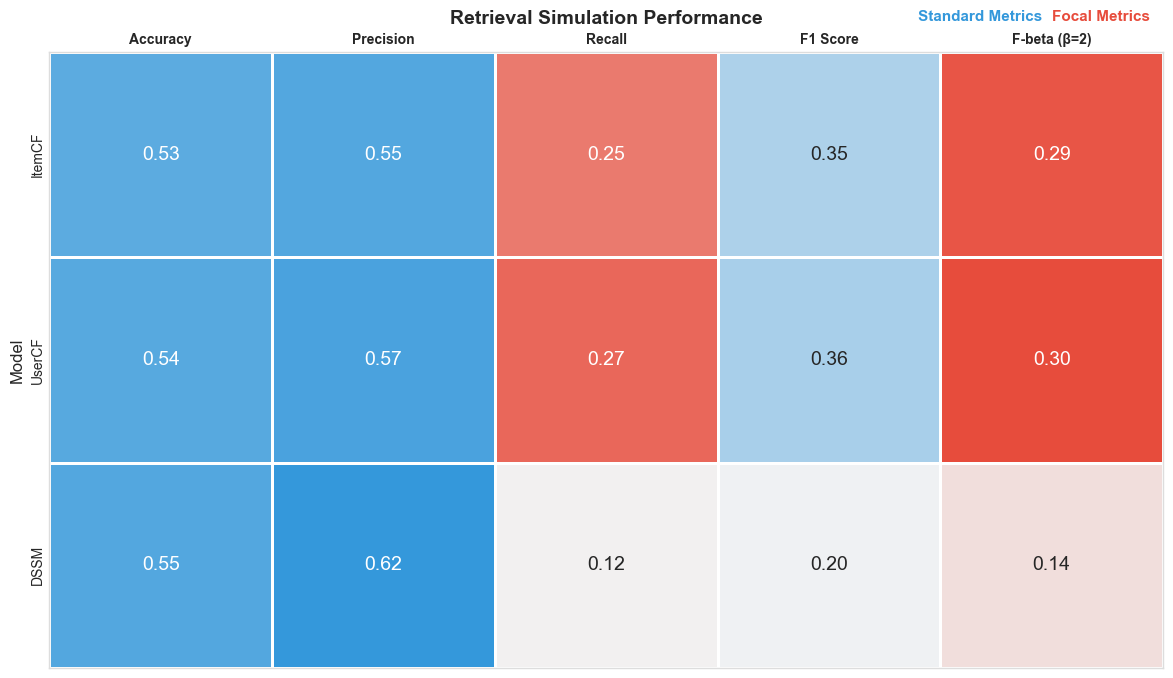

In [46]:
"""""""""""""""""""""
Retrieval Data
"""""""""""""""""""""
retrieval_models = ['ItemCF', 'UserCF', 'DSSM', ]
retrieval_accuracy = [0.53, 0.54, 0.55, ]
retrieval_precision = [0.55, 0.57, 0.62,]
retrieval_recall = [0.25, 0.27, 0.12,]
retrieval_f1 = [0.35, 0.36, 0.2,]
retrieval_f_beta = [0.29, 0.3, 0.14,]

# Full metrics data
retrieval_metrics_data = pd.DataFrame({
    'Model': retrieval_models,
    'Accuracy': retrieval_accuracy,
    'Precision': retrieval_precision,
    'Recall': retrieval_recall,
    'F1 Score': retrieval_f1,
    'F-beta (β=2)': retrieval_f_beta
})

retrieval_title = "Retrieval Simulation Performance"

retrieval_focal_metric = ['Recall', 'F-beta (β=2)']

# Plot the heatmap
retrieval_fig = plot_heatmap(retrieval_metrics_data, plt_title=retrieval_title, focal_metrics=retrieval_focal_metric)